In [1]:
import platform
# 使用しているOSを表示
platform.platform()

'macOS-10.15.7-x86_64-i386-64bit'

In [2]:
# pythonのversionを表示
!python -V

Python 3.8.11


In [3]:
import pubchempy as pcp
# pcpと略すのが一般的
# pubchemのversionを表示
pcp. __version__

'1.0.4'

In [4]:
import pandas as pd
# pdと略すのが一般的
# pandasのversionを表示
pd.__version__

'1.1.3'

In [5]:
from rdkit import rdBase, Chem
print(rdBase.rdkitVersion)

2019.09.3


RDKit WARNING: [10:31:29] Enabling RDKit 2019.09.3 jupyter extensions
[10:31:29] Enabling RDKit 2019.09.3 jupyter extensions


# １分子の読み込み

## rdkit.Chem.MolFromSmiles(smiles)

In [6]:
quercetine = pcp.get_compounds('quercetine', 'name')

In [7]:
quercetine_smiles = quercetine[0].isomeric_smiles
quercetine_smiles

'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O'

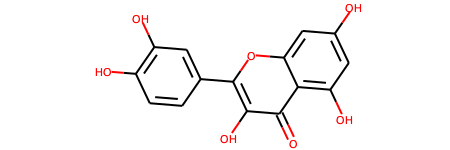

In [8]:
quercetine_mol = Chem.MolFromSmiles(quercetine_smiles)
quercetine_mol 

In [9]:
type(quercetine_mol)

rdkit.Chem.rdchem.Mol

In [10]:
help(quercetine_mol.GetAtoms)

Help on method GetAtoms:

GetAtoms(...) method of rdkit.Chem.rdchem.Mol instance
    GetAtoms( (Mol)arg1) -> _ROAtomSeq :
        Returns a read-only sequence containing all of the molecule's Atoms.
        
    
        C++ signature :
            RDKit::ReadOnlySeq<RDKit::AtomIterator_<RDKit::Atom, RDKit::ROMol>, RDKit::Atom*, RDKit::AtomCountFunctor>* GetAtoms(RDKit::ROMol*)



## rdkit.Chem.MolFromMolBlock(mol_block)

In [11]:
quercetine_sdf = pcp.get_sdf('quercetine', 'name')
print(quercetine_sdf)

5280343
  -OEChem-09292121312D

 32 34  0     0  0  0  0  0  0999 V2000
    6.0682   -0.2704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.8003    1.7296    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.3198    2.7642    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.0682    2.7296    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5381   -0.2945    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.6663   -2.7704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   10.3984   -1.7704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.2022    1.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2022    0.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9343    0.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.8003   -0.2704    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9343    1.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0682    1.7296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.3083    1.76

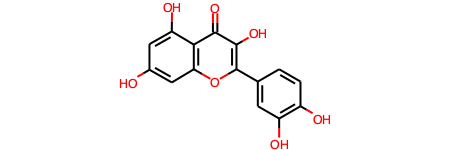

In [12]:
Chem.MolFromMolBlock(quercetine_sdf)

## rdkit.Chem.MolFromInchi(Inchi)

In [13]:
quercetine_inchi = quercetine[0].inchi
quercetine_inchi

'InChI=1S/C15H10O7/c16-7-4-10(19)12-11(5-7)22-15(14(21)13(12)20)6-1-2-8(17)9(18)3-6/h1-5,16-19,21H'

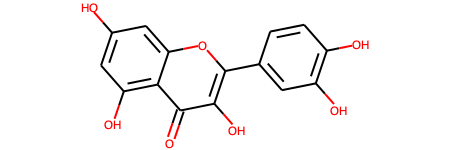

In [14]:
Chem.MolFromInchi(quercetine_inchi)

In [15]:
# その他の読み込み方法もあるが、必要に応じて調べてみてください。
help(Chem.MolFromPDBFile)

Help on built-in function MolFromPDBFile in module rdkit.Chem.rdmolfiles:

MolFromPDBFile(...)
    MolFromPDBFile( (str)molFileName [, (bool)sanitize=True [, (bool)removeHs=True [, (int)flavor=0 [, (bool)proximityBonding=True]]]]) -> Mol :
        Construct a molecule from a PDB file.
        
          ARGUMENTS:
        
            - fileName: name of the file to read
        
            - sanitize: (optional) toggles sanitization of the molecule.
              Defaults to true.
        
            - removeHs: (optional) toggles removing hydrogens from the molecule.
              This only make sense when sanitization is done.
              Defaults to true.
        
            - flavor: (optional) 
        
            - proximityBonding: (optional) toggles automatic proximity bonding
        
          RETURNS:
        
            a Mol object, None on failure.
        
        
    
        C++ signature :
            RDKit::ROMol* MolFromPDBFile(char const* [,bool=True [,boo

# 複数分子の読み込み

In [16]:
suppl = Chem.SDMolSupplier('data/PubChem_TCI_phenol_records.sdf')

In [17]:
type(suppl)

rdkit.Chem.rdmolfiles.SDMolSupplier

In [18]:
# molに変換してリストにする。
mols = [mol for mol in suppl]

In [19]:
len(mols)

117

/Users/hgotoh0820/anaconda3/envs/lecture-beginner/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


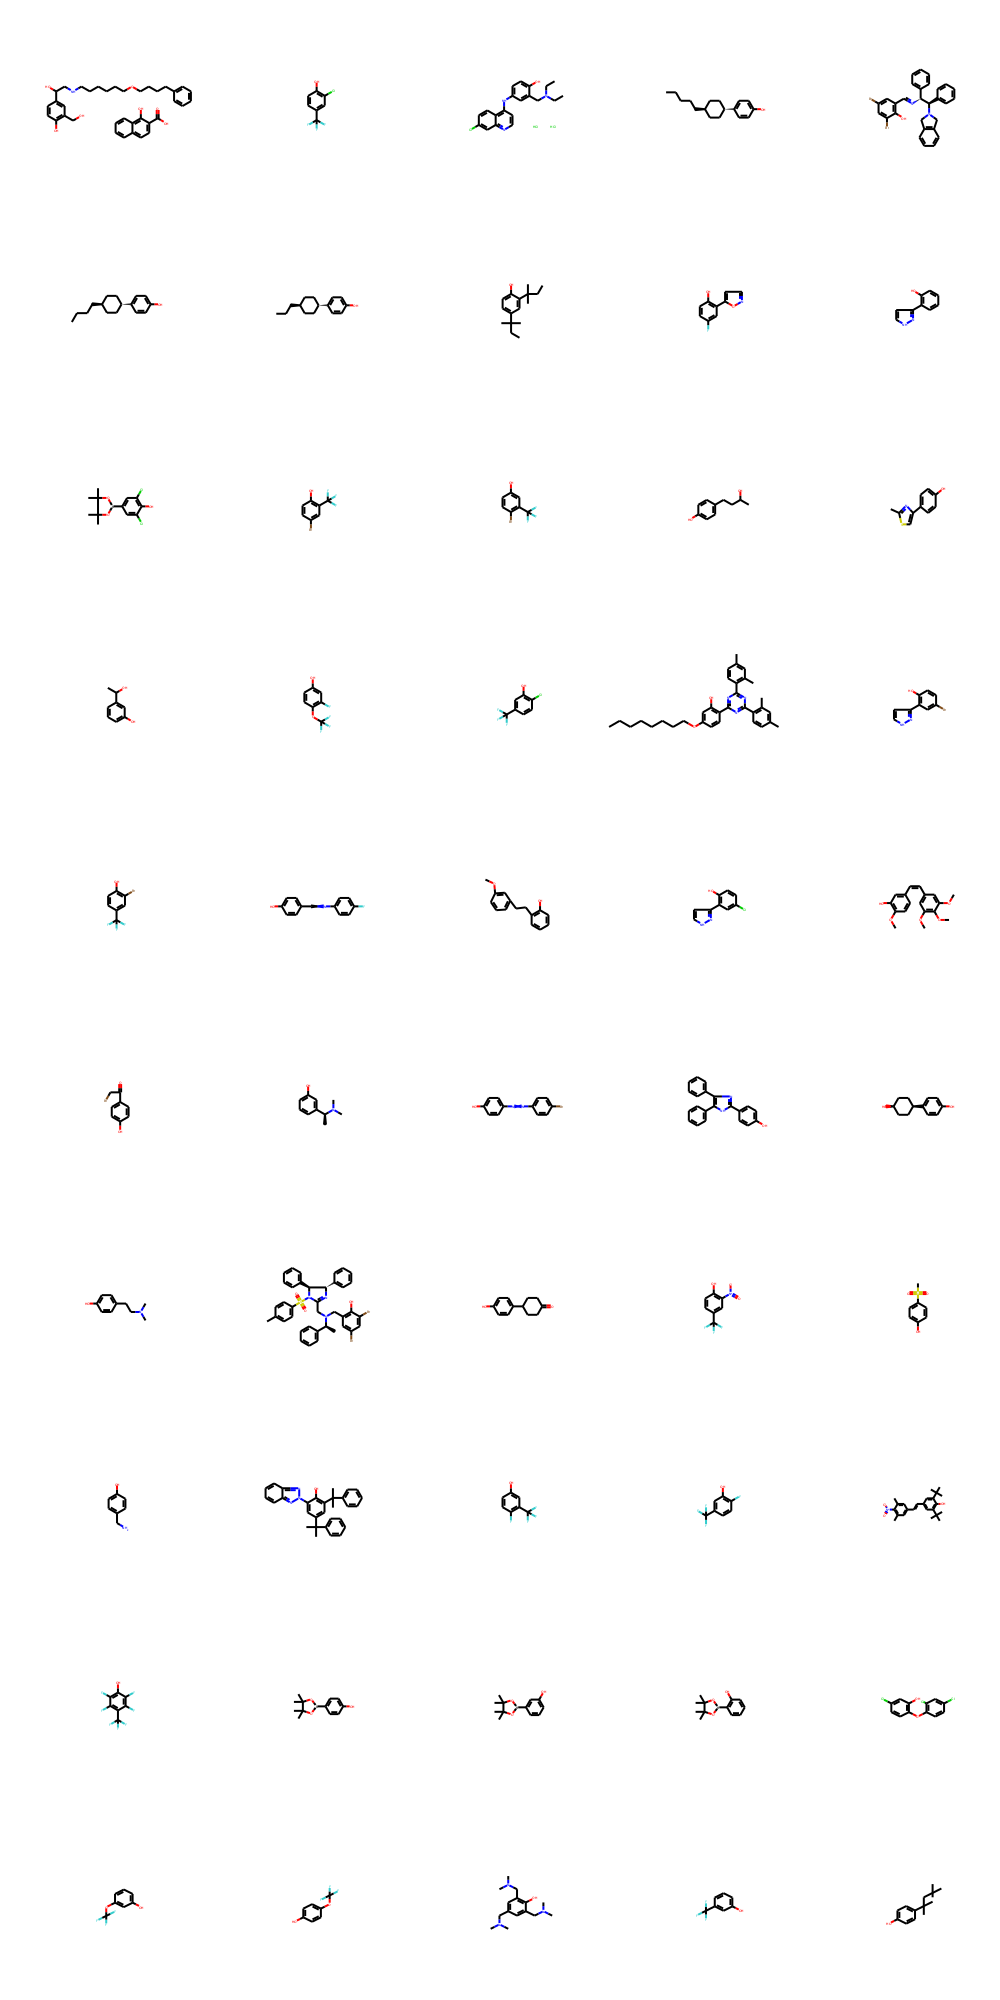

In [20]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200,200))

# Pandasのデータフレームに変換

In [21]:
from rdkit.Chem import AllChem, PandasTools

In [22]:
df = PandasTools.LoadSDF('data/PubChem_TCI_phenol_records.sdf')

,PUBCHEM_COMPOUND_ID_TYPE,PUBCHEM_TOTAL_CHARGE,PUBCHEM_SUBSTANCE_ID,PUBCHEM_SUBSTANCE_VERSION,PUBCHEM_EXT_DATASOURCE_NAME,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_SUBSTANCE_SYNONYM,PUBCHEM_XREF_EXT_ID,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_SUBSTANCE_URL,PUBCHEM_CID_ASSOCIATIONS,PUBCHEM_COORDINATE_TYPE,ID,ROMol,PUBCHEM_BONDANNOTATIONS,PUBCHEM_SUBSTANCE_COMMENT,PUBCHEM_GENERIC_REGISTRY_NAME
0,0,0,354335558,1,TCI (Tokyo Chemical Industry),A3190,4-[1-Hydroxy-2-[[6-(4-phenylbutoxy)hexyl]amino...,A3190,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,56801 1\n5152 2\n6844 2,1\n3,354335558,,NaN,NaN,NaN
1,0,0,354335473,1,TCI (Tokyo Chemical Industry),C3355,2-Chloro-4-(trifluoromethyl)phenol\nC3355,C3355,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,2736603 1,1\n3,354335473,,NaN,NaN,NaN
2,0,0,354335166,1,TCI (Tokyo Chemical Industry),A3133,4-[(7-Chloroquinolin-4-yl)amino]-2-[(diethylam...,A3133,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,6246 1\n313 2\n2165 2,1\n3,354335166,,NaN,NaN,NaN
3,0,0,354334589,1,TCI (Tokyo Chemical Industry),A1827,1-(trans-4-Amylcyclohexyl)-4-hydroxybenzene\n1...,A1827,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,4593765 1,1\n3,354334589,,3 2 6\n8 14 5,NaN,NaN
4,0,0,354334487,1,TCI (Tokyo Chemical Industry),D5160,"2,4-Dibromo-6-[(E)-[[(1R,2R)-2-(isoindolin-2-y...",D5160,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,137247309 1,1\n3,354334487,,6 8 5\n7 13 6,NaN,NaN

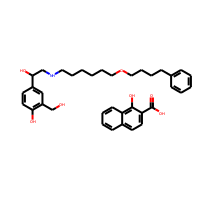
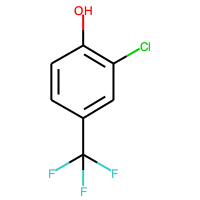
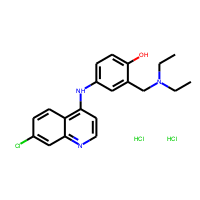
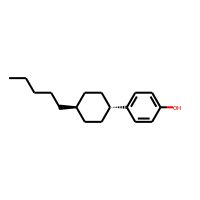
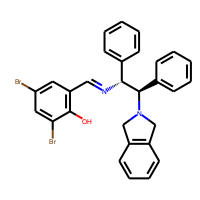

In [23]:
df.head()

In [24]:
df.columns

Index(['PUBCHEM_COMPOUND_ID_TYPE', 'PUBCHEM_TOTAL_CHARGE',
       'PUBCHEM_SUBSTANCE_ID', 'PUBCHEM_SUBSTANCE_VERSION',
       'PUBCHEM_EXT_DATASOURCE_NAME', 'PUBCHEM_EXT_DATASOURCE_REGID',
       'PUBCHEM_SUBSTANCE_SYNONYM', 'PUBCHEM_XREF_EXT_ID',
       'PUBCHEM_EXT_DATASOURCE_URL', 'PUBCHEM_EXT_SUBSTANCE_URL',
       'PUBCHEM_CID_ASSOCIATIONS', 'PUBCHEM_COORDINATE_TYPE', 'ID', 'ROMol',
       'PUBCHEM_BONDANNOTATIONS', 'PUBCHEM_SUBSTANCE_COMMENT',
       'PUBCHEM_GENERIC_REGISTRY_NAME'],
      dtype='object')

,ID,ROMol
0,354335558,
1,354335473,
2,354335166,
3,354334589,
4,354334487,
...,...,...
112,87558359,
113,87558322,
114,87558311,
115,87558282,

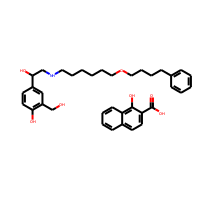
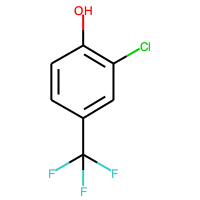
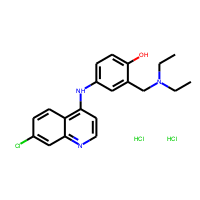
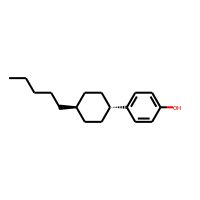
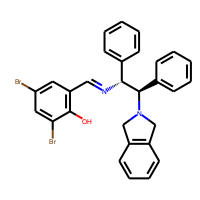
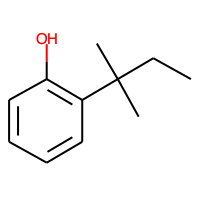
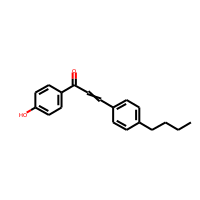
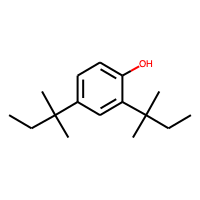
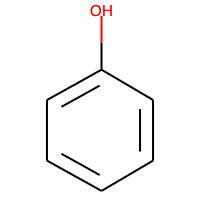
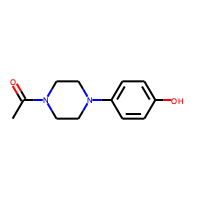

In [25]:
df[['ID','ROMol']]

# すでに読み込んだデータフレームの中にあるsmilesをmolファイルに変換する。

In [26]:
compoundlist = ["phenol", "anisole", "aniline" ]
properties = ['iupacname', 'canonicalsmiles']

In [27]:
import sys
import pandas as pd

df = pd.DataFrame()
for compound in compoundlist:
    try:
        temp = pcp.get_properties(properties, compound, 'name', as_dataframe=True)
        #as_dataframe=True とすることでpandas dataframe として情報を取得可能
        df = pd.concat([df,temp], axis=0, join='outer', sort=True)
    except:
        print("--------error-----------")
        print(cas)
        print(sys.exc_info())
        pass

In [28]:
df

,CanonicalSMILES,IUPACName
CID,,
996,C1=CC=C(C=C1)O,phenol
7519,COC1=CC=CC=C1,anisole
6115,C1=CC=C(C=C1)N,aniline


In [29]:
#すでにSMILESが書かれているものに対してMolオブジェクトを追加するやり方
PandasTools.AddMoleculeColumnToFrame(df, "CanonicalSMILES")

,CanonicalSMILES,IUPACName,ROMol
CID,,,
996,C1=CC=C(C=C1)O,phenol,
7519,COC1=CC=CC=C1,anisole,
6115,C1=CC=C(C=C1)N,aniline,

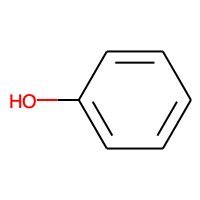
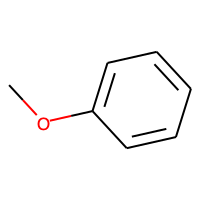
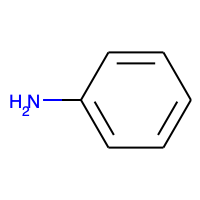

In [30]:
df

## RDKitとpubchemで出力するsmilesの差

In [31]:
df["smiles_from_RDKit"] = df["ROMol"].map(Chem.MolToSmiles)

,CanonicalSMILES,IUPACName,ROMol,smiles_from_RDKit
CID,,,,
996,C1=CC=C(C=C1)O,phenol,,Oc1ccccc1
7519,COC1=CC=CC=C1,anisole,,COc1ccccc1
6115,C1=CC=C(C=C1)N,aniline,,Nc1ccccc1

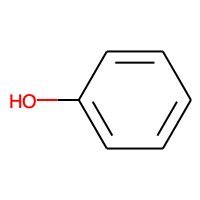
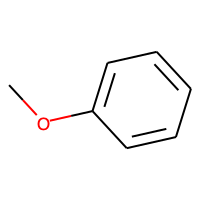
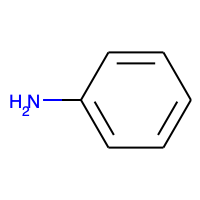

In [32]:
df

## 出力

In [33]:
df_to_csv = df[['IUPACName', 'smiles_from_RDKit']]
df_to_csv

,IUPACName,smiles_from_RDKit
CID,,
996,phenol,Oc1ccccc1
7519,anisole,COc1ccccc1
6115,aniline,Nc1ccccc1


In [34]:
!ls

data
homework.ipynb
lecture_note_RDKit_no1_分子の読み込みと表示と出力.ipynb
lecture_note_RDKit_no2_Descriptorsの使い方.ipynb
lecture_note_RDKit_no3_分子の取り扱い方.ipynb
lecture_note_RDKit_no4_構造変換.ipynb
lecture_note_RDKit_no5_部分構造探索.ipynb


In [35]:
df_to_csv.to_csv('output.csv')

In [36]:
!ls

data
homework.ipynb
lecture_note_RDKit_no1_分子の読み込みと表示と出力.ipynb
lecture_note_RDKit_no2_Descriptorsの使い方.ipynb
lecture_note_RDKit_no3_分子の取り扱い方.ipynb
lecture_note_RDKit_no4_構造変換.ipynb
lecture_note_RDKit_no5_部分構造探索.ipynb
output.csv


In [37]:
df_from_csv = pd.read_csv('output.csv')
df_from_csv

,CID,IUPACName,smiles_from_RDKit
0,996,phenol,Oc1ccccc1
1,7519,anisole,COc1ccccc1
2,6115,aniline,Nc1ccccc1


In [38]:
!rm output.csv

In [39]:
!ls

data
homework.ipynb
lecture_note_RDKit_no1_分子の読み込みと表示と出力.ipynb
lecture_note_RDKit_no2_Descriptorsの使い方.ipynb
lecture_note_RDKit_no3_分子の取り扱い方.ipynb
lecture_note_RDKit_no4_構造変換.ipynb
lecture_note_RDKit_no5_部分構造探索.ipynb
